## Question 1

(a) Load the dataset and construct a feature vector for each article in the entire dataset. You need to report the number of articles, and the number of extracted features. Show 5 example articles with their extracted features using a dataframe.

In [1]:
!pip install matplotlib
!pip install seaborn

zsh:1: command not found: pip
zsh:1: command not found: pip


In [2]:
!pip3 install matplotlib
!pip3 install seaborn

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import label_binarize
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing

data = pd.read_csv('train.csv')
vectorizer = CountVectorizer()
matrix = vectorizer.fit_transform(data['Text'])
X = data.drop('Category', axis=1)
y = data['Category']


# training data
X_bow = pd.DataFrame(data=matrix.toarray(), columns=vectorizer.get_feature_names_out())
#(number of documents, number of features)
X_bow.shape

(428, 13518)

In [4]:
#top 5
non_zero_cols = X_bow.loc[:4].sum() != 0
non_zero_cols = non_zero_cols[non_zero_cols].index.tolist()

top5 = X_bow[non_zero_cols]

top5.head()

,000,10,11,12,121,125,14,165,17,19,...,woven,writing,written,year,yearned,years,younger,youngsters,youthful,zooropa
0,1,0,0,0,0,0,2,0,0,0,...,1,1,0,0,0,1,2,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,3,1,0,0,1,0,1,...,0,0,1,2,0,0,0,0,0,0
3,0,0,1,1,0,0,0,0,0,0,...,0,0,0,4,0,0,0,0,0,0
4,0,1,0,1,0,1,0,0,1,0,...,0,0,0,1,1,2,0,0,1,1


<Axes: >

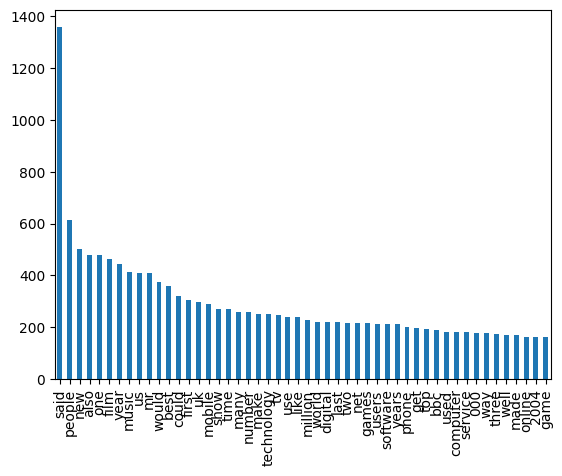

In [5]:
feature_sum = X_bow.sum(axis=0)
feature_sum = feature_sum.sort_values(ascending=False)
feature_sum = feature_sum.head(50)
feature_sum.plot.bar()
# vocab = vectorizer.vocabulary_
# #sorted_vocab =
# #top50 = list(sorted_vocab)[140:160]
# pd.DataFrame(vocab, columns=['Term', 'Index'])

## Bar plot of top 50 words

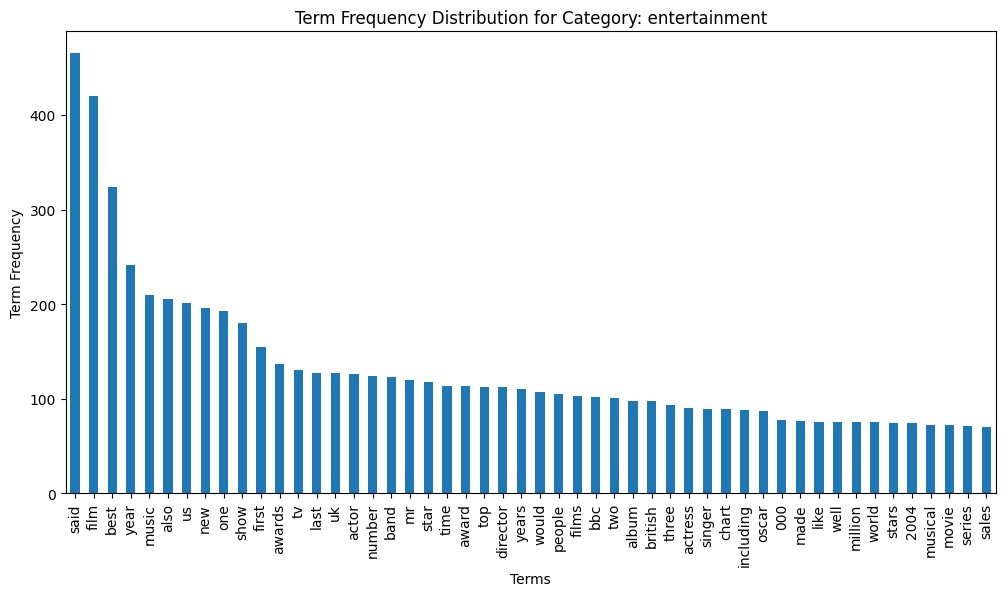

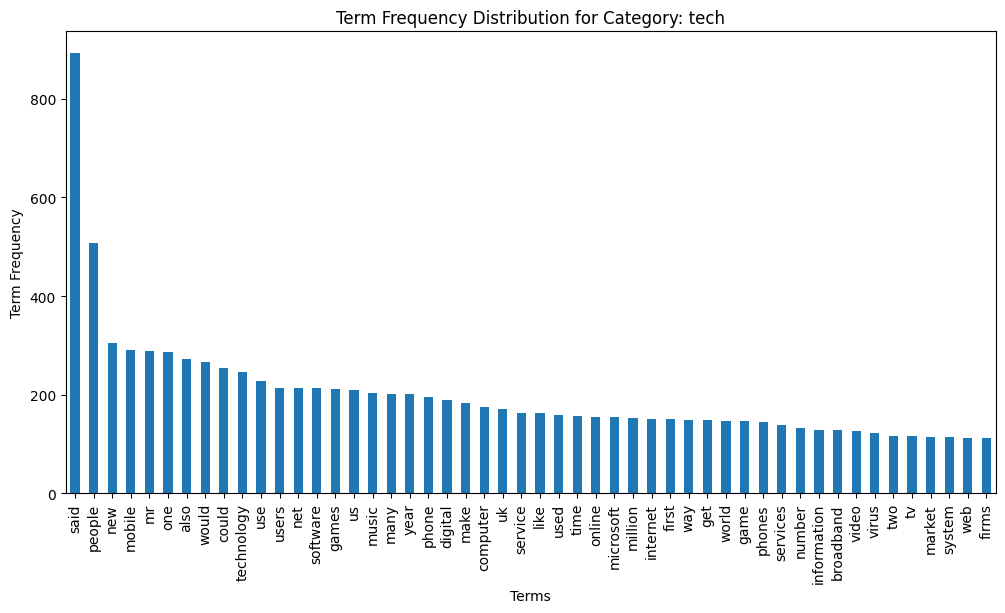

In [10]:
grouped = X_bow.join(data['Category']).groupby('Category')

# Plot the term frequency distribution for each category
for category, group in grouped:
    plt.figure(figsize=(12, 6))
    term_freq = group.drop('Category', axis=1).sum(axis=0)  # Drop the 'Category' column
    term_freq = term_freq.sort_values(ascending=False)[:50]  # Sort the term frequencies
    term_freq.plot(kind='bar')
    plt.xlabel('Terms')
    plt.ylabel('Term Frequency')
    plt.title(f'Term Frequency Distribution for Category: {category}')
    plt.xticks(rotation=90)
    plt.show()


## Bar plot of top 100 words

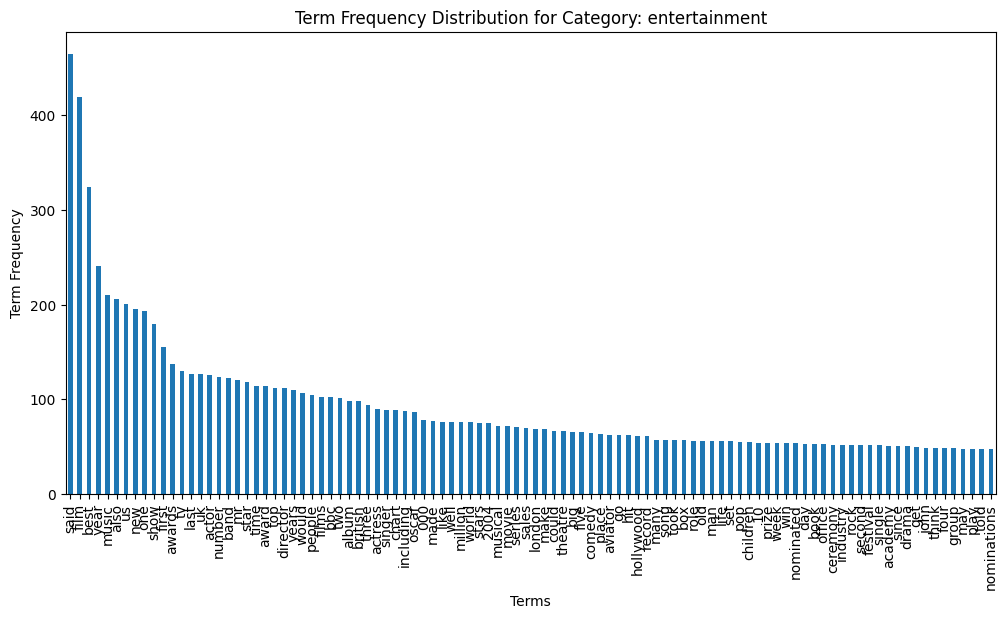

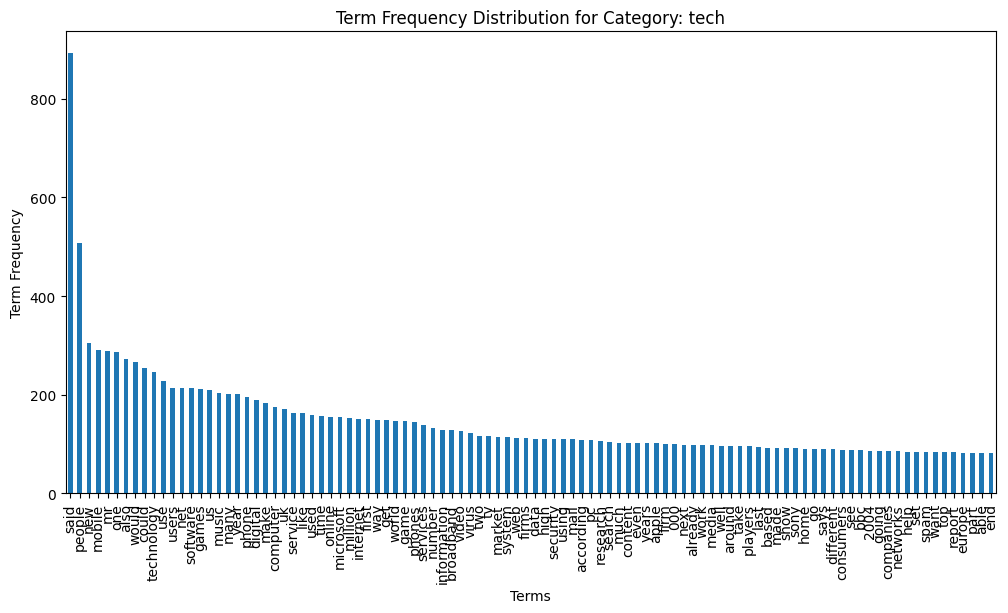

In [11]:
grouped = X_bow.join(data['Category']).groupby('Category')

# Plot the term frequency distribution for each category
for category, group in grouped:
    plt.figure(figsize=(12, 6))
    term_freq = group.drop('Category', axis=1).sum(axis=0)  # Drop the 'Category' column
    term_freq = term_freq.sort_values(ascending=False)[:100]  # Sort the term frequencies
    term_freq.plot(kind='bar')
    plt.xlabel('Terms')
    plt.ylabel('Term Frequency')
    plt.title(f'Term Frequency Distribution for Category: {category}')
    plt.xticks(rotation=90)
    plt.show()


## Density Plot

/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_19955/3586609973.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)
/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_19955/3586609973.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)


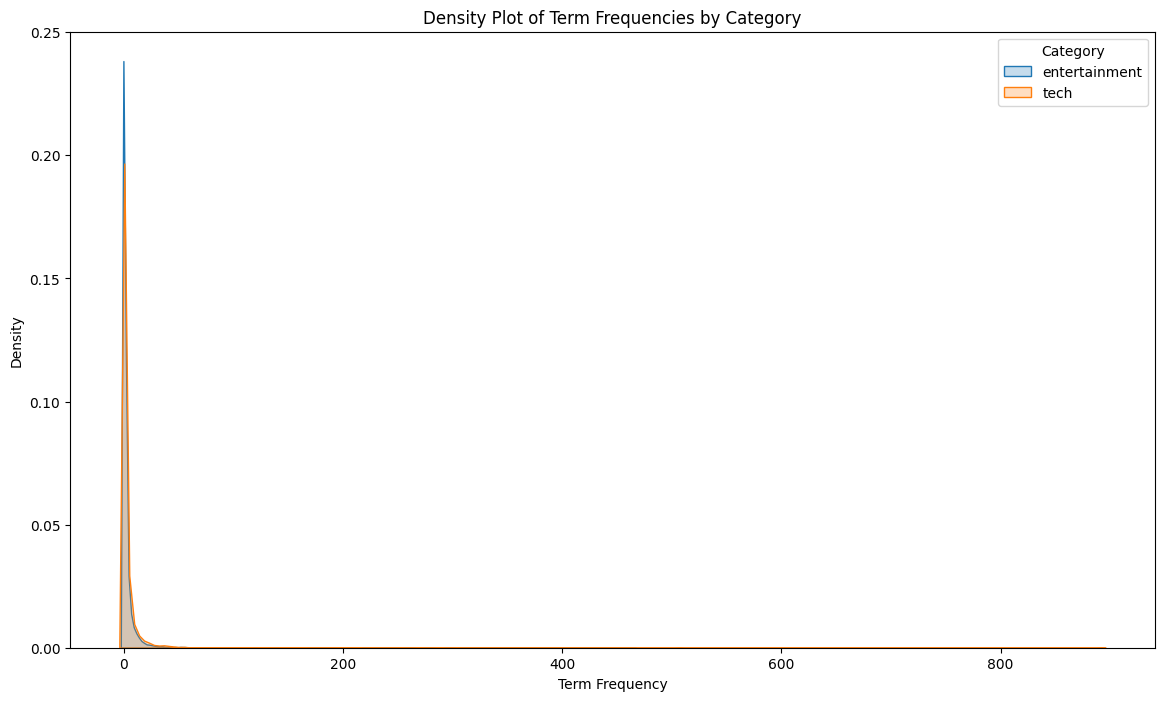

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

grouped = X_bow.join(data['Category']).groupby('Category')

plt.figure(figsize=(14, 8))

for category, group in grouped:
    term_freq = group.drop(columns='Category').sum(axis=0)
    sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)

plt.xlabel('Term Frequency')
plt.ylabel('Density')
plt.title('Density Plot of Term Frequencies by Category')
plt.legend(title='Category')

plt.show()

### Limiting the amount of data shown to 50

/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_19955/1298397577.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)
/var/folders/n7/wvtv_r9d2sz89m7blzwgzxmw0000gn/T/ipykernel_19955/1298397577.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)


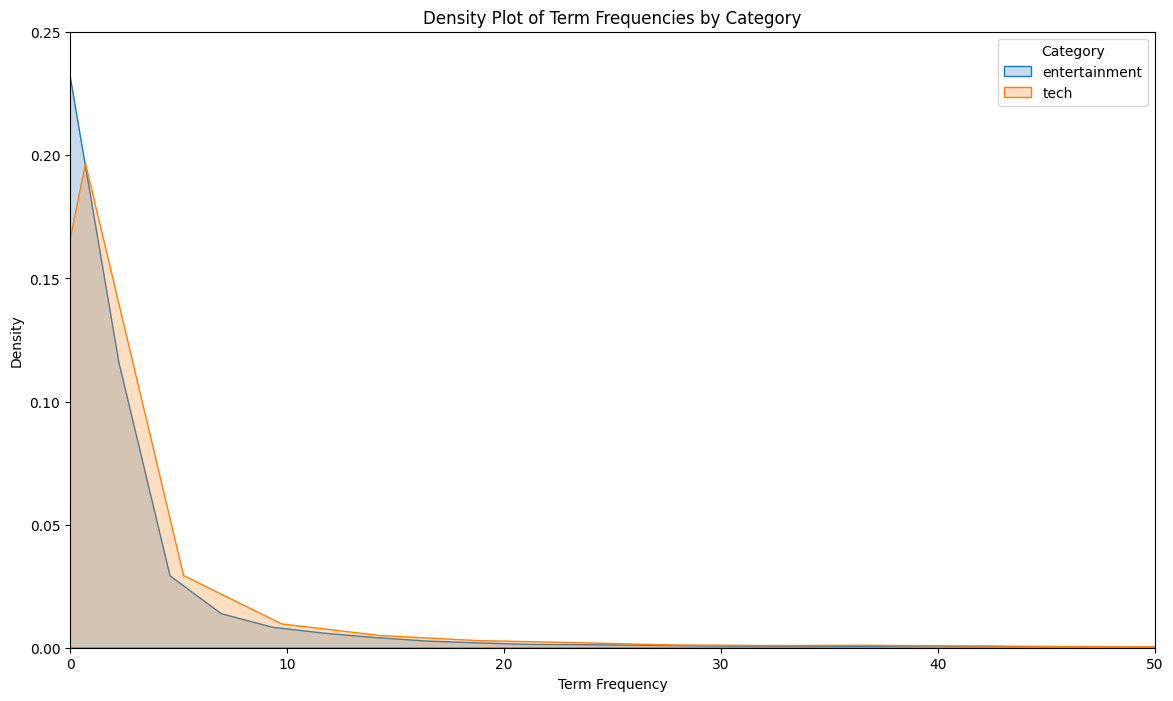

In [9]:
grouped = X_bow.join(data['Category']).groupby('Category')

plt.figure(figsize=(14, 8))

for category, group in grouped:
    term_freq = group.drop(columns='Category').sum(axis=0)
    sns.kdeplot(term_freq, shade=True, label=category, bw_adjust=0.5)

plt.xlabel('Term Frequency')
plt.ylabel('Density')
plt.title('Density Plot of Term Frequencies by Category')
plt.legend(title='Category')
plt.xlim(0, 50)
plt.show()

### Using log to transform the data into a more readble format

C:\Users\garet\AppData\Local\Temp\ipykernel_13692\2372486324.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(term_freq), shade=True, label=category)
C:\Users\garet\AppData\Local\Temp\ipykernel_13692\2372486324.py:10: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(np.log1p(term_freq), shade=True, label=category)


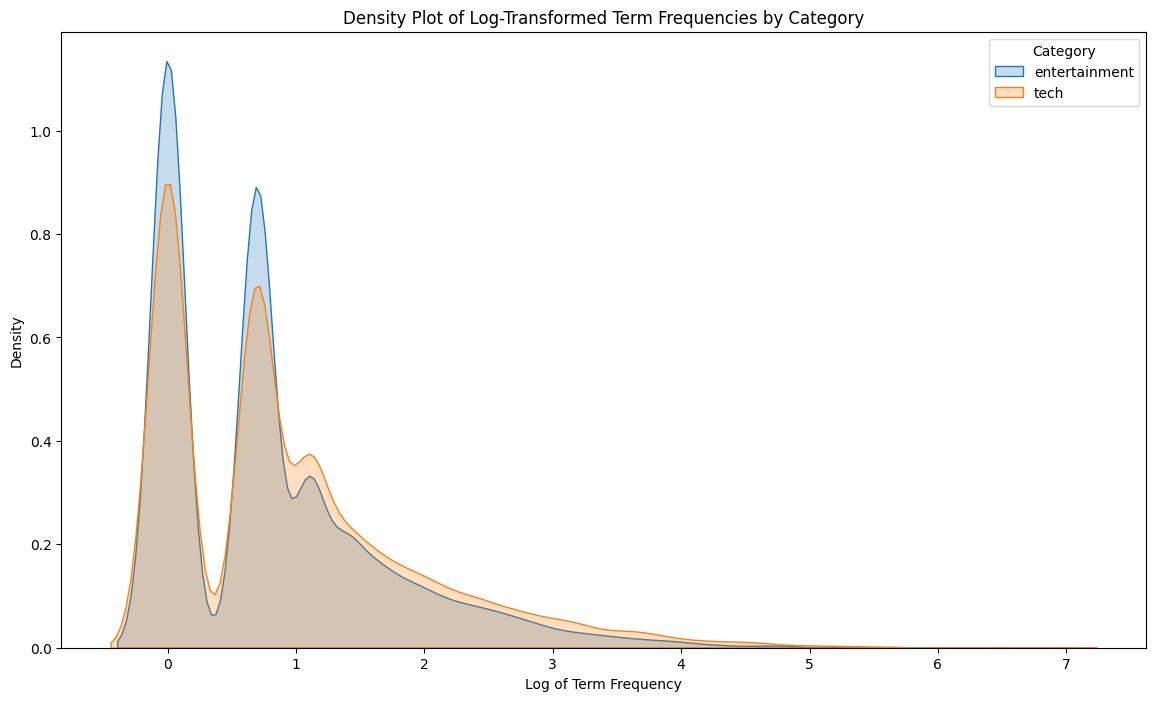

In [7]:
plt.figure(figsize=(14, 8))

for category, group in grouped:
    term_freq = group.drop(columns='Category').sum(axis=0)
    sns.kdeplot(np.log1p(term_freq), shade=True, label=category)

plt.xlabel('Log of Term Frequency')
plt.ylabel('Density')
plt.title('Density Plot of Log-Transformed Term Frequencies by Category')
plt.legend(title='Category')
plt.show()

## Class Distribution

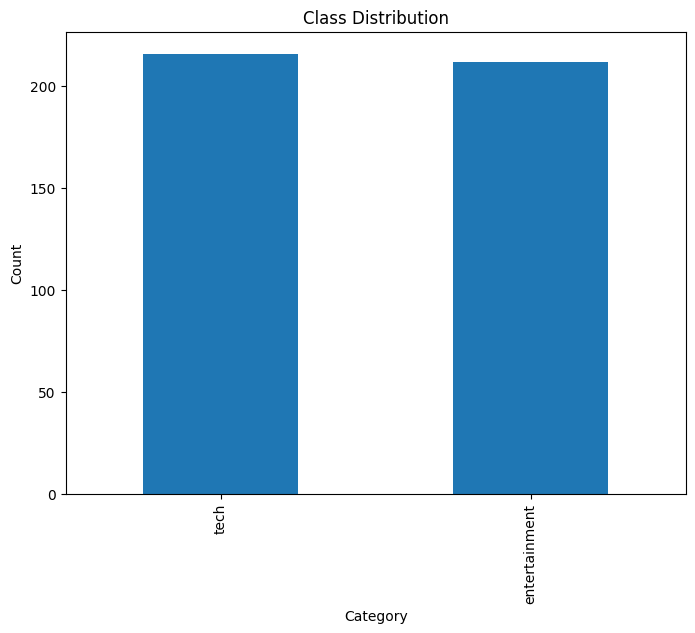

In [8]:
plt.figure(figsize=(8, 6))
data['Category'].value_counts().plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()